<a href="https://colab.research.google.com/github/Ananya2003Gupta/MLDLS22/blob/main/Asg02%2603_MLDLS22_Task2_Binaryclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KMeans Clustering Algorithm**

#**Binary Classification Dataset**

#**Success of Learning New Sports Prediction**

#Importing or Uploading the Dataset

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving successrate_classification.csv to successrate_classification.csv
User uploaded file "successrate_classification.csv" with length 12128 bytes


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [3]:
#importing the libraries
import pandas as pd 
import numpy as np 
import  seaborn as sns
import matplotlib.pyplot as plt

#Reading the Dataset
Here, dataset is a csv file

In [4]:
#loading the dataset
df= pd.read_csv('successrate_classification.csv')

#Analysing the Dataset

In [5]:
print(df)

           age   interest  success
0    23.657801  18.859917      0.0
1    22.573729  17.969223      0.0
2    32.553424  29.463651      0.0
3     6.718035  25.704665      1.0
4    14.401919  16.770856      0.0
..         ...        ...      ...
292  27.697220  18.799309      0.0
293  15.150959  72.000352      1.0
294  22.264378  68.453459      1.0
295  25.677420  90.118212      1.0
296  21.215594  48.265520      1.0

[297 rows x 3 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [7]:
df.isnull().sum()

age         0
interest    0
success     0
dtype: int64

In [8]:
df.dtypes

age         float64
interest    float64
success     float64
dtype: object

In [9]:
print(df.head())

         age   interest  success
0  23.657801  18.859917      0.0
1  22.573729  17.969223      0.0
2  32.553424  29.463651      0.0
3   6.718035  25.704665      1.0
4  14.401919  16.770856      0.0


In [10]:
print(df.tail())

           age   interest  success
292  27.697220  18.799309      0.0
293  15.150959  72.000352      1.0
294  22.264378  68.453459      1.0
295  25.677420  90.118212      1.0
296  21.215594  48.265520      1.0


#Allocating values

In [11]:
y=df.iloc[:,2].values

In [12]:
df=df.drop('success',axis=1)

In [13]:
X= df.iloc[:,0].values
Y= df.iloc[:,1].values

#Plotting the Graph of Age vs Interest 

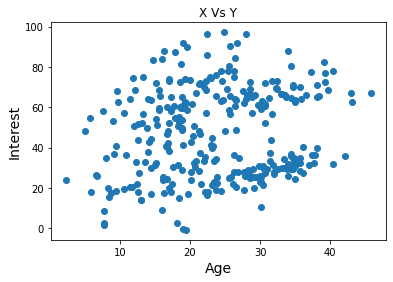

In [14]:
plt.scatter(X, Y)
plt.title('X Vs Y')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Interest', fontsize=14)
plt.show()

#The Elbow Method

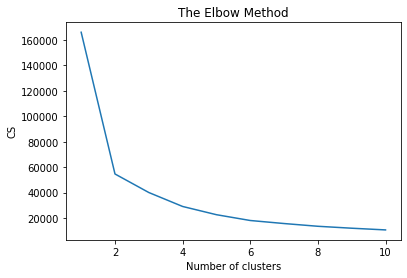

In [15]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#Kmeans Class definition
Source: https://gist.github.com/ImadDabbura/6e2230b33373991aa3ccdbff6ebb3fd7#file-kmeans-py

In [16]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

#Kmeans Clustering Using Kmeans function of sklearn library

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,)
kmeans.fit(df)
# checking how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 37 out of 297 samples were correctly labeled.
Accuracy score: 0.12


#Plot of Clusters formed by Kmeans Clustering Algorithm

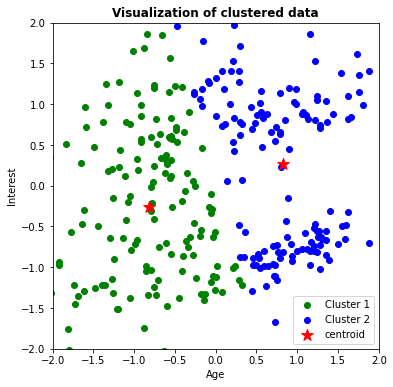

In [19]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(df)

kmeans = Kmeans(n_clusters=2, max_iter=100)
kmeans.fit(x_std)
centroids = kmeans.centroids

# Plotting the clustered data
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(x_std[kmeans.labels == 0, 0], x_std[kmeans.labels == 0, 1],
            c='green', label='Cluster 1')
plt.scatter(x_std[kmeans.labels == 1, 0], x_std[kmeans.labels == 1, 1],
            c='blue', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Age')
plt.ylabel('Interest')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');